## ❓ Quantify network uncertainity

This notebook was forked from the [SymbNET metabolic modeling training materials](https://github.com/franciscozorrilla/SymbNET):

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6323607.svg)](https://doi.org/10.5281/zenodo.6323607)

You are now familiar with how the CarveMe can build ensemble models, next we will inspect the generated output. This notebook loads the ensembles directly from the `/ensembles/` folder. You may follow along passively on GitHub or launch the jupyter notebook from your terminal to interactively run through each code chunk. To do so, launch jupyter from your terminal:
```bash
$ cd $ROOT
$ jupyter notebook --browser firefox
```
This should launch a browser window where you can navigate to the `SymbNET/scripts/` folder and click on the appropriate file to launch this notebook interactively.

Note: this script is forked from Daniel's [carveme_paper repo](https://github.com/cdanielmachado/carveme_paper/blob/master/notebooks/Ensemble%20distances.ipynb).


### Load libraries

In [2]:
%matplotlib inline

In [3]:
from scipy.spatial.distance import jaccard
from framed.cobra.ensemble import load_ensemble
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

## 🍎 Load models

In [5]:
### Strains
organisms = ['A. muciniphila','A. putredinis','B. adolescentis','B. animalis subsp. lactis BI-07','B. clarus','B. crossotus','B. dorei','B. eggerthii','B. fragilis','B. hansenii','B. longum subsp. infantis','B. thetaiotaomicron','B. uniformis','B. vulgatus','C. bolteae','C. comes','C. perfringens','C. ramosum','C. saccharolyticum','D. formicigenerans','E. coli IAI1','E. eligens','E. lenta','E. limosum','E. rectale','E. siraeum','F. nucleatum subsp. nucleatum','L. gasseri','L. lactis','L. paracasei','L. plantarum','P. capillosus','P. copri','P. distasonis','P. melaninogenica','R. bromii','R. gnavus','R. intestinalis','S. parasanguinis','S. salivarius']

### Load M3 gapfilled models
models = {
    'A. muciniphila': '../ensembles/NT5021.xml',
    'A. putredinis': '../ensembles/NT5014.xml',
    'B. adolescentis': '../ensembles/NT5022.xml',
    'B. animalis subsp. lactis BI-07': '../ensembles/NT5044.xml',
    'B. clarus': '../ensembles/NT5052.xml',
    'B. crossotus': '../ensembles/NT5013.xml',
    'B. dorei': '../ensembles/NT5049.xml',
    'B. eggerthii': '../ensembles/NT5051.xml',
    'B. fragilis': '../ensembles/NT5003.xml',
    'B. hansenii': '../ensembles/NT5005.xml',
    'B. longum subsp. infantis': '../ensembles/NT5023.xml',
    'B. thetaiotaomicron': '../ensembles/NT5004.xml',
    'B. uniformis': '../ensembles/NT5002.xml',
    'B. vulgatus': '../ensembles/NT5001.xml',
    'C. bolteae': '../ensembles/NT5026.xml',
    'C. comes': '../ensembles/NT5048.xml',
    'C. perfringens': '../ensembles/NT5032.xml',
    'C. ramosum': '../ensembles/NT5006.xml',
    'C. saccharolyticum': '../ensembles/NT5037.xml',
    'D. formicigenerans': '../ensembles/NT5076.xml',
    'E. coli IAI1': '../ensembles/NT5077.xml',
    'E. eligens': '../ensembles/NT5075.xml',
    'E. lenta': '../ensembles/NT5024.xml',
    'E. limosum': '../ensembles/NT5068.xml',
    'E. rectale': '../ensembles/NT5009.xml',
    'E. siraeum': '../ensembles/NT5040.xml',
    'F. nucleatum subsp. nucleatum': '../ensembles/NT5025.xml',
    'L. gasseri': '../ensembles/NT5007.xml',
    'L. lactis': '../ensembles/YK0001.xml',
    'L. paracasei': '../ensembles/NT5042.xml',
    'L. plantarum': '../ensembles/YK0002.xml',
    'P. capillosus': '../ensembles/NT5008.xml',
    'P. copri': '../ensembles/NT5019.xml',
    'P. distasonis': '../ensembles/NT5074.xml',
    'P. melaninogenica': '../ensembles/NT5020.xml',
    'R. bromii': '../ensembles/NT5045.xml',
    'R. gnavus': '../ensembles/NT5046.xml',
    'R. intestinalis': '../ensembles/NT5011.xml',
    'S. parasanguinis': '../ensembles/NT5072.xml',
    'S. salivarius': '../ensembles/NT5038.xml',
}

for label, model_file in models.items():
    models[label] =  load_ensemble(model_file, flavor='fbc2')
    
# calculate distances
def ensemble_distance(ensemble):
    bin_matrix = [[int(ensemble.reaction_states[r_id][i])
                   for r_id in ensemble.reaction_states]
                  for i in range(ensemble.size)]
    
    distances = [jaccard(bin_matrix[i], bin_matrix[j])
                 for i in range(ensemble.size)
                 for j in range(i+1, ensemble.size)]
    
    return distances
dists = {label: ensemble_distance(model) for label, model in models.items()}


## Plot

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

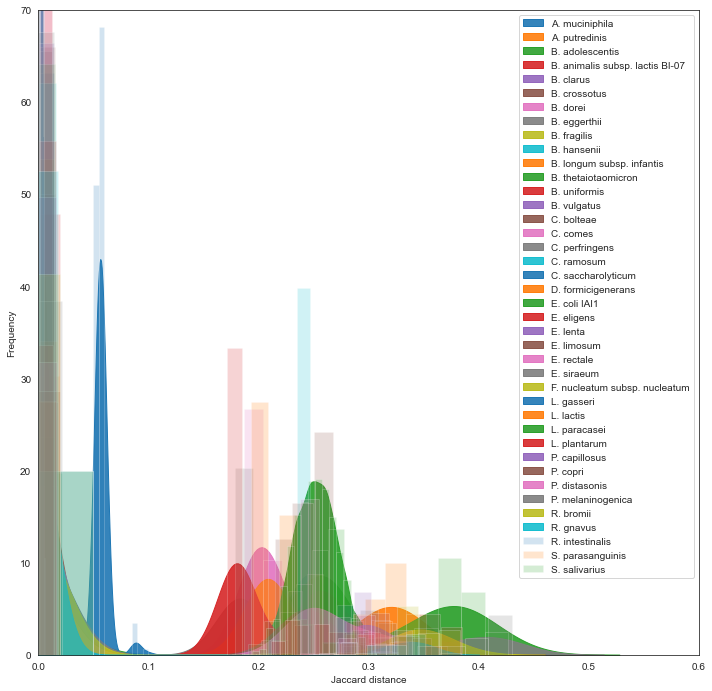

In [10]:
_, ax = plt.subplots(figsize=(10,10))
colors = sns.color_palette(n_colors=40)
for i, label in enumerate(organisms):
    sns.distplot(dists[label], ax=ax, bins=20, kde=True, norm_hist=True, color=colors[i],
                  hist_kws={'alpha': 0.2}, kde_kws={'shade': True, 'alpha':0.9})

ax.set_xlabel('Jaccard distance')
ax.set_ylabel('Frequency')
ax.legend(organisms)
ax.set_xlim(0,0.6)
ax.set_ylim(0,70)
plt.tight_layout()
plt.savefig('../plots/ensemble_dist.png',dpi=300)

Compare with [plot generated for CarveMe paper](https://raw.githubusercontent.com/cdanielmachado/carveme_paper/master/results/other/ensemble_distances.png). Note that ensembles with no variance in Jaccard distance are not plotted and have a shaded out color in the legend.

## 🐈‍ Discussion questions

 - Compare your community's plot with the one [generated for CarveMe paper](https://raw.githubusercontent.com/cdanielmachado/carveme_paper/master/results/other/ensemble_distances.png), is there more or less uncertainity?
 - What does it mean if the average/median Jaccard distance between models is 1 for a given ensemble?
 - What does it mean if the average/median Jaccard distance between models is 0 for a given ensemble?